1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

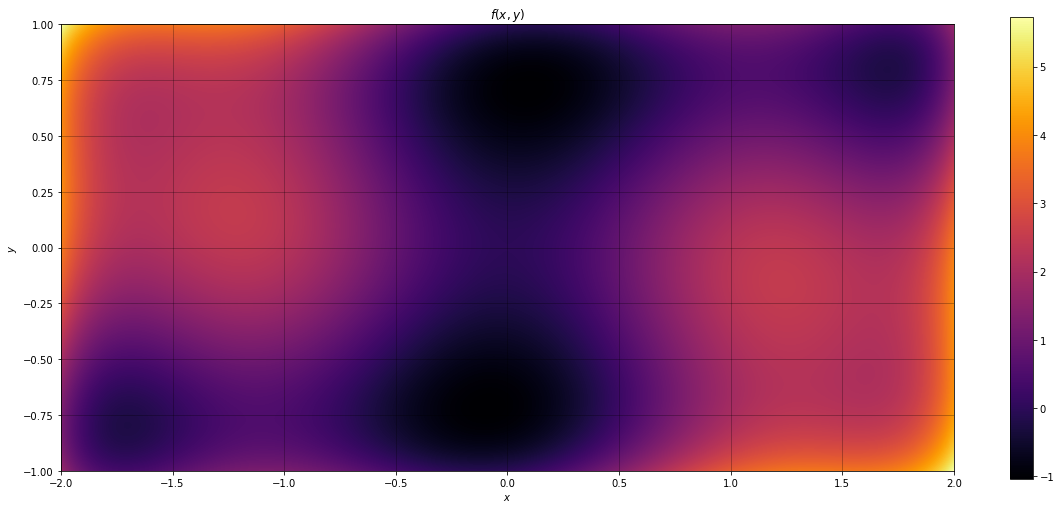

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# defining the function to minimize
def f(X):
    x, y = X[0], X[1]
    return (4 - 2.1*(x**2) + (x**4)/3)*(x**2) + x*y + (4*(y**2) - 4)*(y**2)

# creating the grid on which f(x,y) will be evaluated
x_bound = (-2, 2)
y_bound = (-1, 1)
nx, ny = 1000, 1000
x = np.linspace(x_bound[0], x_bound[1], nx)
y = np.linspace(y_bound[0], y_bound[1], ny)
xx, yy = np.meshgrid(x, y, sparse=True)

# plotting f(x,y) on the grid
fig, ax = plt.subplots(figsize=(20, 10))
plot = ax.imshow(f([xx, yy]), cmap='inferno', extent=x_bound+y_bound)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('$f(x,y)$')
fig.colorbar(plot, shrink=0.85)
ax.grid(color='black', alpha=1/3)
plt.show()

Given the above plot, it makes sense to assume that, in the region under consideration, $f(x, y)$ has two global minima. Let's find them:

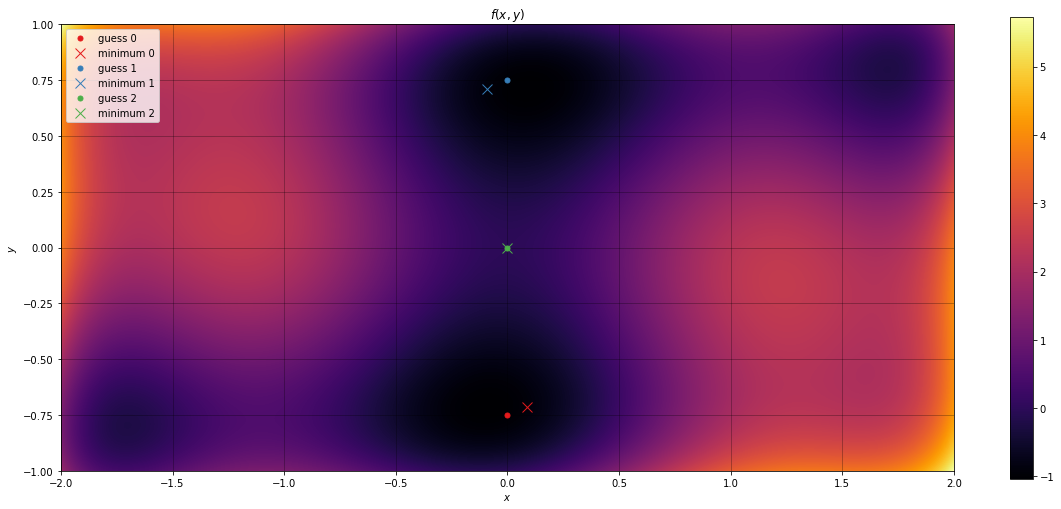

In [2]:
import matplotlib.cm as cm
from scipy.optimize import minimize

# creating the list of points that will be used as initial guesses by 'scipy.optimize.minimize()'
guesses = []

# estimating the coordinates of the two global minima by looking at the above plot
guesses.append((0, -0.75))   # approximate coordinates of the 1st global minimum
guesses.append((0, 0.75))   # approximate coordinates of the 2nd global minimum

# seeing what happens when using (0, 0) as initial guess
guesses.append((0, 0))

# plotting f(x,y) on the grid
fig, ax = plt.subplots(figsize=(20, 10))
plot = ax.imshow(f([xx, yy]), cmap='inferno', extent=x_bound+y_bound)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('$f(x,y)$')
fig.colorbar(plot, shrink=0.85)

# finding the minima of f(x,y) and plotting the results
cmap = cm.get_cmap('Set1')
minima = []
for i, guess in zip(range(len(guesses)), guesses):
    res = minimize(f, x0=guess, bounds=(x_bound, y_bound))
    minima.append(res)
    ax.plot(guess[0], guess[1], color=cmap(i), marker='o', markersize=5, linestyle='None', label='guess '+str(i))
    ax.plot(res.x[0], res.x[1], color=cmap(i), marker='x', markersize=10, linestyle='None', label='minimum '+str(i))
ax.legend(loc='upper left')
ax.grid(color='black', alpha=1/3)
plt.show()

In [3]:
import pandas as pd

# printing the results about the minima of f(x,y) found by 'scipy.optimize.minimize()'
minima = pd.DataFrame(minima)
minima = minima[['x', 'fun', 'success', 'nit']]
minima.columns = ['(x_min, y_min)', 'f(x_min, y_min)', 'success', '# iterations']
minima['(x_guess, y_guess)'] = guesses
print("Results about the minima of 'f(x,y)' found by 'scipy.optimize.minimize()':")
minima

Results about the minima of 'f(x,y)' found by 'scipy.optimize.minimize()':


,"(x_min, y_min)","f(x_min, y_min)",success,# iterations,"(x_guess, y_guess)"
0,"[0.08984186715477369, -0.7126563797298975]",-1.031628,True,5,"(0, -0.75)"
1,"[-0.08984187640947437, 0.7126563696990844]",-1.031628,True,5,"(0, 0.75)"
2,"[0.0, 0.0]",0.000000,True,0,"(0, 0)"


Given the values of $f(x_{min}, y_{min})$ found by 'scipy.optimize.minimize()', it follows that:
- as expected, the true global minima are only two and are described by the first two rows of the above DataFrame;
- for $(0, 0)$ as initial guess, the minimizer gets stuck in $(0, 0)$ (probably because it is a saddle point), so it fails to converge to one of the two global minima.

In [4]:
# printing the results about the global minima of f(x,y)
minima = minima.head(2)
print("Results about the global minima of 'f(x,y)':")
minima

Results about the global minima of 'f(x,y)':


,"(x_min, y_min)","f(x_min, y_min)",success,# iterations,"(x_guess, y_guess)"
0,"[0.08984186715477369, -0.7126563797298975]",-1.031628,True,5,"(0, -0.75)"
1,"[-0.08984187640947437, 0.7126563696990844]",-1.031628,True,5,"(0, 0.75)"


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

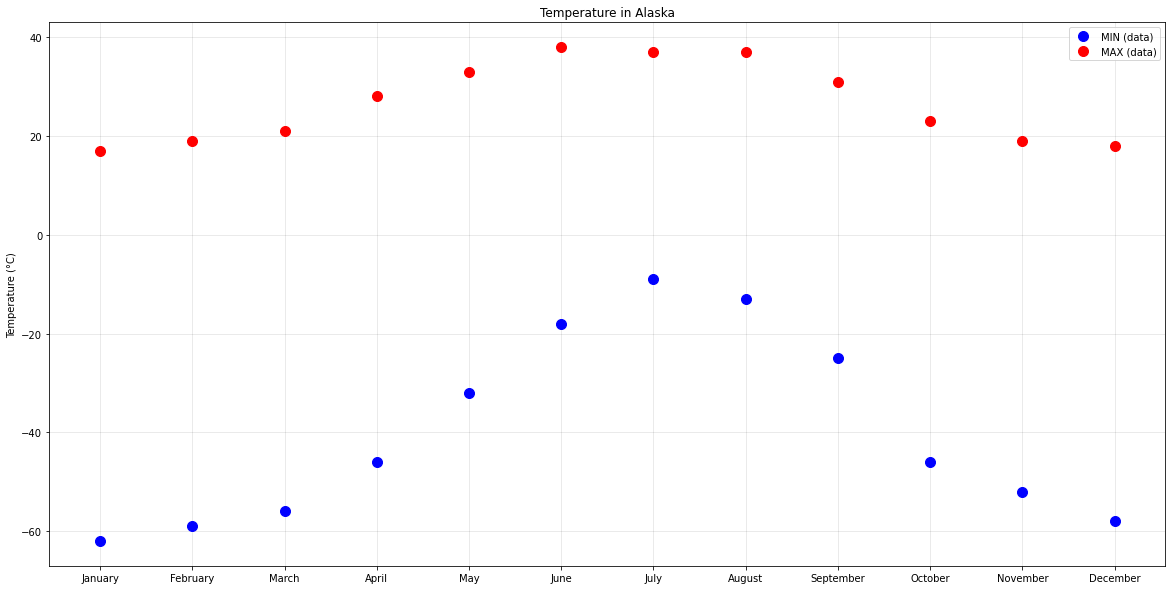

In [5]:
from calendar import month_name

# plotting the temperatures
months = month_name[1:]
max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(months, min, color='blue', marker='o', markersize=10, linestyle='None', label='MIN (data)')
ax.plot(months, max, color='red', marker='o', markersize=10, linestyle='None', label='MAX (data)')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature in Alaska')
ax.legend()
ax.grid(color='black', alpha=.1)
plt.show()

For obvious reasons, it is reasonable to assume that temperature trends over time are periodic with period equal to 12 months.

Given also the trends shown in the above plot, it makes sense to try to describe the dependence of temperatures on time using a sinusoidal function.

Let's define it and then fit it to the data:

Optimal parameters for MIN temperatures:
A = 25.14962039241145 +- 1.3145619794687116
T = 10.448974944970207 +- 0.4003111485789977
phi = 3.687897261970465 +- 0.14305082592559634
k = -36.712570966102625 +- 1.1910521099116964

Optimal parameters for MAX temperatures:
A = 10.581699540322951 +- 0.41007841203514117
T = 10.608574337490284 +- 0.37941906344379756
phi = 3.3894521029827147 +- 0.12602223054635192
k = 27.949635389890528 +- 0.4282480730298373


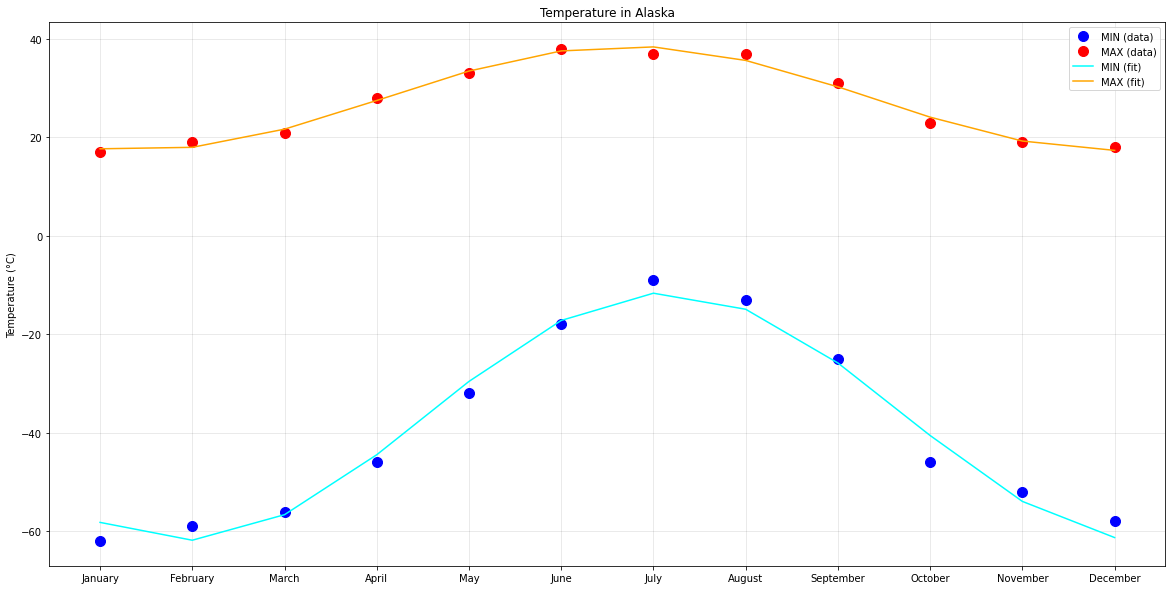

In [6]:
from scipy.optimize import curve_fit

# defining the function that will be used to describe the data
def f(t, A, T, phi, k):
    omega = (2*np.pi)/T
    return A*np.cos(omega*t-phi)+k
pnames = ['A', 'T', 'phi', 'k']

# fitting the function to the data about MIN temperatures
min_pguess = [30, 11, np.pi, -30]   # initial guess for the parameters A, T, phi, k
min_popt, min_pcov = curve_fit(f=f, xdata=range(len(months)), ydata=min, p0=min_pguess)
min_perrors = np.sqrt(np.diag(min_pcov))
print("Optimal parameters for MIN temperatures:")
for param_name, param_value, param_error in zip(pnames, min_popt, min_perrors):
    print(param_name, "=", param_value, "+-", param_error)

# fitting the function to the data about MAX temperatures
max_pguess = [10, 11, np.pi, 30]   # initial guess for the parameters A, T, phi, k
max_popt, max_pcov = curve_fit(f=f, xdata=range(len(months)), ydata=max, p0=max_pguess)
max_perrors = np.sqrt(np.diag(max_pcov))
print("\nOptimal parameters for MAX temperatures:")
for param_name, param_value, param_error in zip(pnames, max_popt, max_perrors):
    print(param_name, "=", param_value, "+-", param_error)

# plotting the temperatures
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(months, min, color='blue', marker='o', markersize=10, linestyle='None', label='MIN (data)')
ax.plot(months, max, color='red', marker='o', markersize=10, linestyle='None', label='MAX (data)')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature in Alaska')

# plotting the fitted functions
ax.plot(range(len(months)), f(range(len(months)), min_popt[0], min_popt[1], min_popt[2], min_popt[3]), color='cyan', label='MIN (fit)')
ax.plot(range(len(months)), f(range(len(months)), max_popt[0], max_popt[1], max_popt[2], max_popt[3]), color='orange', label='MAX (fit)')
ax.legend()
ax.grid(color='black', alpha=.1)
plt.show()

The fit seems to be reasonable as the fitted functions follow the trends of the temperatures quite correctly.

However, to give a definitive answer it would be necessary to be aware of the uncertainties related to temperature measurements!

In other words, if the fitted functions were always within the error bars, then it could be more confidently said that the fit is satisfactory.

In [7]:
# checking if the time offset for MIN and MAX temperatures is the same within the fit accuracy
delta_T = abs(min_popt[1]-max_popt[1])
delta_phi = abs(min_popt[2]-max_popt[2])
print("Is the optimal parameter 'T' for MIN and MAX temperatures the same within the fit accuracy?", delta_T < np.min([min_perrors[1], max_perrors[1]]))
print("Is the optimal parameter 'phi' for MIN and MAX temperatures the same within the fit accuracy?", delta_phi < np.min([min_perrors[2], max_perrors[2]]))

Is the optimal parameter 'T' for MIN and MAX temperatures the same within the fit accuracy? True
Is the optimal parameter 'phi' for MIN and MAX temperatures the same within the fit accuracy? False


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [8]:
import wget

# downloading the dataset 'residuals_261.pkl' and loading it into a pandas DataFrame 'df'
#wget.download("https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl", "/Users/Daniele/data/")
file = np.load('/Users/Daniele/data/residuals_261.pkl', allow_pickle=True)
df = pd.DataFrame(file.item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [9]:
# cleaning the dataset 'df' by removing the entries (rows) corresponding to 'residual' values in absolute value smaller than 2 (as in 06ex.3)
df = df[abs(df['residuals']) < 2]
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


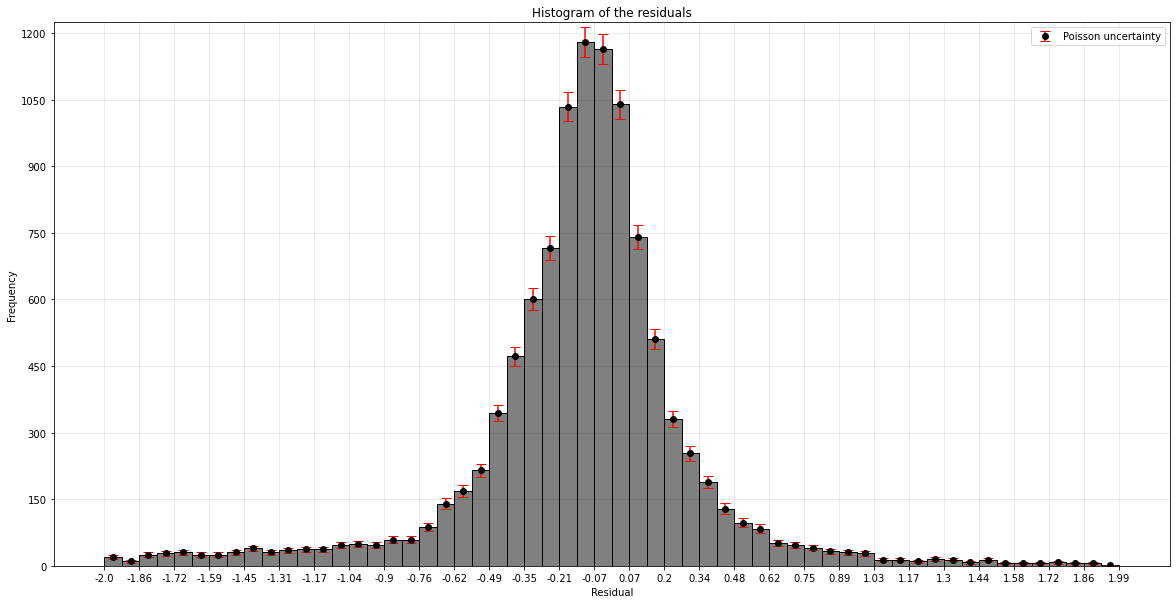

In [10]:
from matplotlib.ticker import MaxNLocator

# filling the histogram
fig, ax = plt.subplots(figsize=(20, 10))
bins_values, bins_edges, _ = ax.hist(df['residuals'], bins='scott', color='grey', edgecolor='black')   # 'scott': estimator that takes into account data variability and data size
ax.set_xlabel('Residual')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of the residuals')
ax.set_xticks(bins_edges[::2])
ax.set_xticklabels(np.around(bins_edges[::2], 2))
ax.yaxis.set_major_locator(MaxNLocator(nbins='auto', integer=True))
errors = np.sqrt(bins_values)   # computing poisson uncertainties
bins_centers = (bins_edges[:-1]+bins_edges[1:])/2
ax.errorbar(x=bins_centers, y=bins_values, yerr=errors, fmt='o', color='black', ecolor='red', capsize=5, label='Poisson uncertainty')
ax.set_ylim(top=(bins_values+errors).max()+10)
ax.legend()
ax.grid(color='black', alpha=.1)
plt.show()

The distribution of the residuals looks like a Gaussian distribution. Therefore, let's define a Gaussian function and try to fit it to the histogram of the residuals:

Best-fit values of the parameters of the function 'gauss(x)':
a = 1111.4979197147802 +- 24.58123285176205
mu = -0.08443151913027916 +- 0.005757455203839491
sigma = 0.22546282613047688 +- 0.0057574552443512


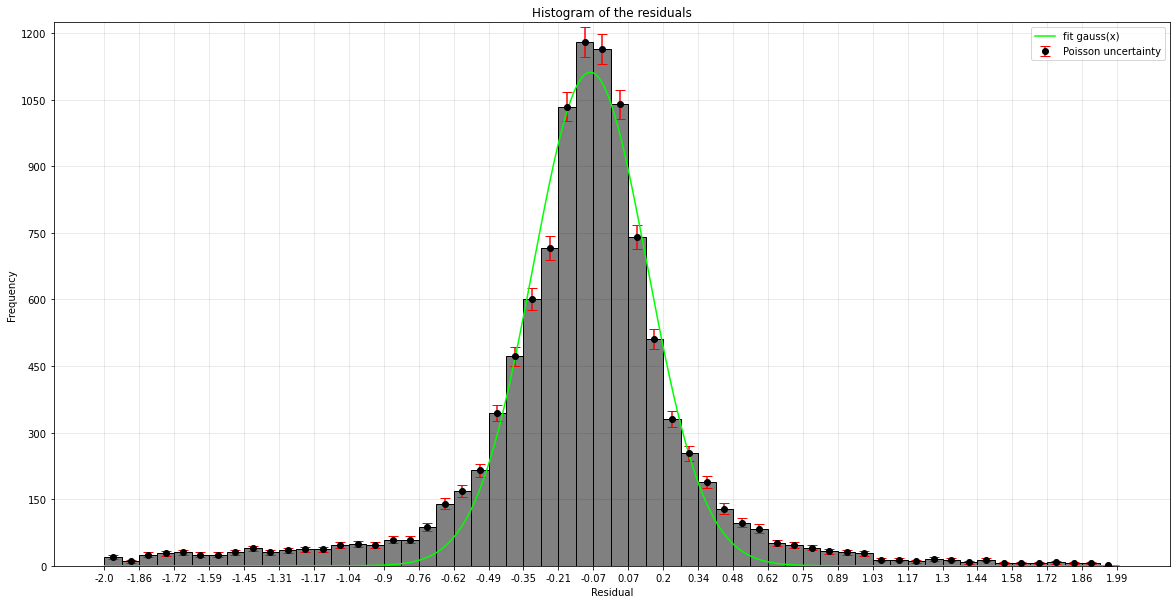

In [11]:
# defining the gaussian function 'gauss(x)' that will be fitted to the histogram of the residuals
def gauss(x, a, mu, sigma):
    return a*np.exp(-((x-mu)**2)/(2*(sigma**2)))
gauss_pnames = ['a', 'mu', 'sigma']

# fitting the function 'gauss(x)' to the histogram
gauss_pguess = [1000, -0.1, 0.2]   # initial guess for the parameters a, mu, sigma
gauss_popt, gauss_pcov = curve_fit(f=gauss, xdata=bins_centers, ydata=bins_values, p0=gauss_pguess)
gauss_perrors = np.sqrt(np.diag(gauss_pcov))
print("Best-fit values of the parameters of the function 'gauss(x)':")
for param_name, param_value, param_error in zip(gauss_pnames, gauss_popt, gauss_perrors):
    print(param_name, "=", param_value, "+-", param_error)

# filling the histogram
fig, ax = plt.subplots(figsize=(20, 10))
bins_values, bins_edges, _ = ax.hist(df['residuals'], bins='scott', color='grey', edgecolor='black')   # 'scott': estimator that takes into account data variability and data size
ax.set_xlabel('Residual')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of the residuals')
ax.set_xticks(bins_edges[::2])
ax.set_xticklabels(np.around(bins_edges[::2], 2))
ax.yaxis.set_major_locator(MaxNLocator(nbins='auto', integer=True))
ax.errorbar(x=bins_centers, y=bins_values, yerr=errors, fmt='o', color='black', ecolor='red', capsize=5, label='Poisson uncertainty')
ax.set_ylim(top=(bins_values+errors).max()+10)
ax.grid(color='black', alpha=.1)

# plotting the best-fit model 'gauss(x)'
x = np.linspace(-2, 2, 10000)
ax.plot(x, gauss(x, gauss_popt[0], gauss_popt[1], gauss_popt[2]), color='lime', label='fit gauss(x)')
ax.legend()
plt.show()

In [12]:
from scipy import stats

# performing a chi-squared test for the model 'gauss(x)'
print("Chi-squared test for the model 'gauss(x)'...")
ndof = len(bins_centers)-len(gauss_popt)   # number of degrees of freedom = number of observations - number of fitted parameters
print("Number of degrees of freedom:", ndof)
chi2 = np.sum(((bins_values - gauss(bins_centers, gauss_popt[0], gauss_popt[1], gauss_popt[2]))**2) / (errors**2))
print("chi-squared =", chi2)
pvalue = 1.-stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)   # if p-value < 0.05, then the fit is considered unsatisfactory!

Chi-squared test for the model 'gauss(x)'...
Number of degrees of freedom: 55
chi-squared = 1347.7536098796666
p-value = 0.0


Since $pvalue = 0$, the fit is considered unsatisfactory! Let's try to add a 2nd Gaussian component to the fitting function:

Best-fit values of the parameters of the function 'gauss2(x)':
a1 = 761.5447968611585 +- 48.208711347354836
mu1 = -0.06895214375928589 +- 0.004174818890535565
sigma1 = 0.14376024291761638 +- 0.0072240886577491685
a2 = 443.83501618486304 +- 49.908689578162054
mu2 = -0.12050977084972131 +- 0.012485186919090648
sigma2 = 0.36621126397951603 +- 0.019160491194307742


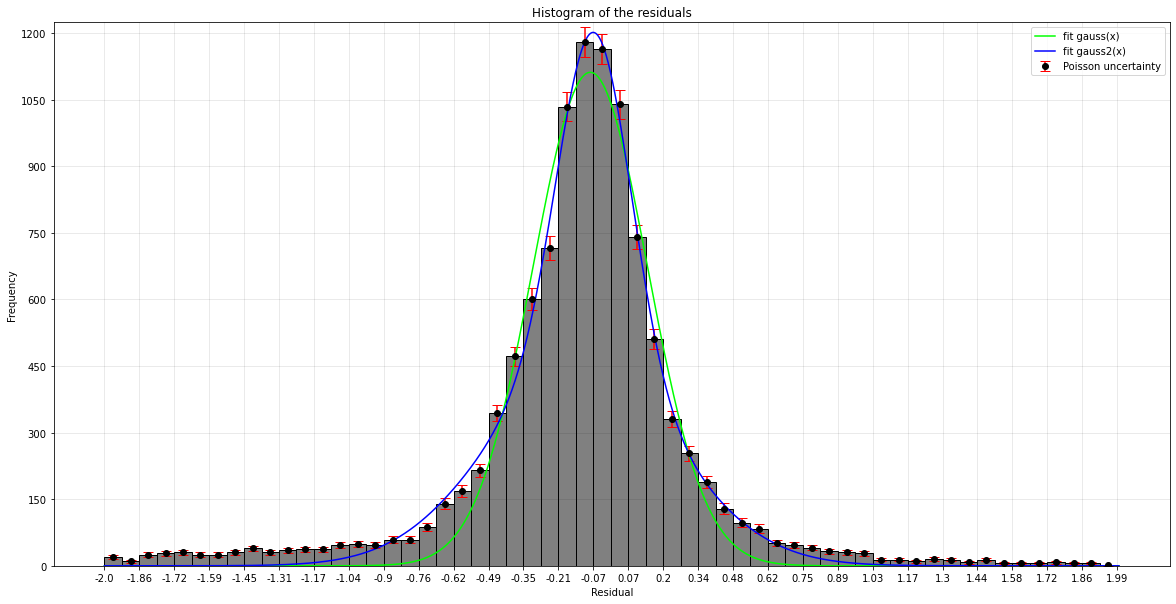

In [13]:
# defining the function 'gauss2(x)' that will be fitted to the histogram of the residuals
def gauss2(x, a1, mu1, sigma1, a2, mu2, sigma2):
    return a1*np.exp(-((x-mu1)**2)/(2*(sigma1**2))) + a2*np.exp(-((x-mu2)**2)/(2*(sigma2**2)))
gauss2_pnames = ['a1', 'mu1', 'sigma1', 'a2', 'mu2', 'sigma2']

# fitting the function 'gauss2(x)' to the histogram
gauss2_pguess = [1000, -0.1, 0.2, 500, -0.1, 0.4]   # initial guess for the parameters a1, mu1, sigma1, a2, mu2, sigma2
gauss2_popt, gauss2_pcov = curve_fit(f=gauss2, xdata=bins_centers, ydata=bins_values, p0=gauss2_pguess)
gauss2_perrors = np.sqrt(np.diag(gauss2_pcov))
print("Best-fit values of the parameters of the function 'gauss2(x)':")
for param_name, param_value, param_error in zip(gauss2_pnames, gauss2_popt, gauss2_perrors):
    print(param_name, "=", param_value, "+-", param_error)

# filling the histogram
fig, ax = plt.subplots(figsize=(20, 10))
bins_values, bins_edges, _ = ax.hist(df['residuals'], bins='scott', color='grey', edgecolor='black')   # 'scott': estimator that takes into account data variability and data size
ax.set_xlabel('Residual')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of the residuals')
ax.set_xticks(bins_edges[::2])
ax.set_xticklabels(np.around(bins_edges[::2], 2))
ax.yaxis.set_major_locator(MaxNLocator(nbins='auto', integer=True))
ax.errorbar(x=bins_centers, y=bins_values, yerr=errors, fmt='o', color='black', ecolor='red', capsize=5, label='Poisson uncertainty')
ax.set_ylim(top=(bins_values+errors).max()+10)
ax.grid(color='black', alpha=.1)

# plotting the best-fit models 'gauss(x)', 'gauss2(x)'
ax.plot(x, gauss(x, gauss_popt[0], gauss_popt[1], gauss_popt[2]), color='lime', label='fit gauss(x)')
ax.plot(x, gauss2(x, gauss2_popt[0], gauss2_popt[1], gauss2_popt[2], gauss2_popt[3], gauss2_popt[4], gauss2_popt[5]), color='blue', label='fit gauss2(x)')
ax.legend()
plt.show()

In [14]:
# performing a chi-squared test for the model 'gauss2(x)'
print("Chi-squared test for the model 'gauss2(x)'...")
ndof = len(bins_centers)-len(gauss2_popt)   # number of degrees of freedom = number of observations - number of fitted parameters
print("Number of degrees of freedom:", ndof)
chi2 = np.sum(((bins_values - gauss2(bins_centers, gauss2_popt[0], gauss2_popt[1], gauss2_popt[2], gauss2_popt[3], gauss2_popt[4], gauss2_popt[5]))**2) / (errors**2))
print("chi-squared =", chi2)
pvalue = 1.-stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)   # if p-value < 0.05, then the fit is considered unsatisfactory!

Chi-squared test for the model 'gauss2(x)'...
Number of degrees of freedom: 52
chi-squared = 606.7863361843051
p-value = 0.0


Since $pvalue = 0$, the fit is still considered unsatisfactory! In particular, it is observed that the model still fails to adequately describe the tails of the histogram.

Therefore, it makes sense to assume that the tails of the histogram have a non-Gaussian origin!

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [15]:
# loading the dataset 'munich_temperatures_average_with_bad_data.txt' into a pandas DataFrame 'df'
df = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=' ', names=['year', 'temperature'])
df

,year,temperature
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


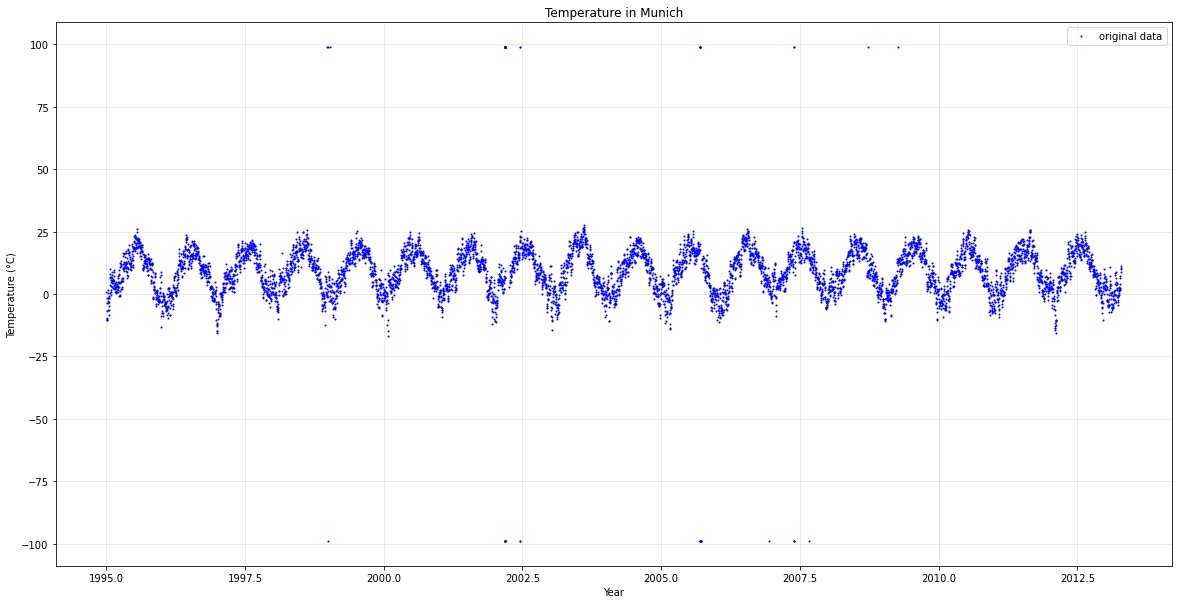

In [16]:
# plotting the original data
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['year'], df['temperature'], color='blue', marker='o', markersize=1, linestyle='None', label='original data')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature in Munich')
ax.legend()
ax.grid(color='black', alpha=.1)
plt.show()

In [17]:
# removing bad data from the dataset 'df'
df = df[df['temperature'] < 90]   # removing data corresponding to temperatures > 90 °C
df = df[df['temperature'] > -90]   # removing data corresponding to temperatures < -90 °C
df

,year,temperature
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


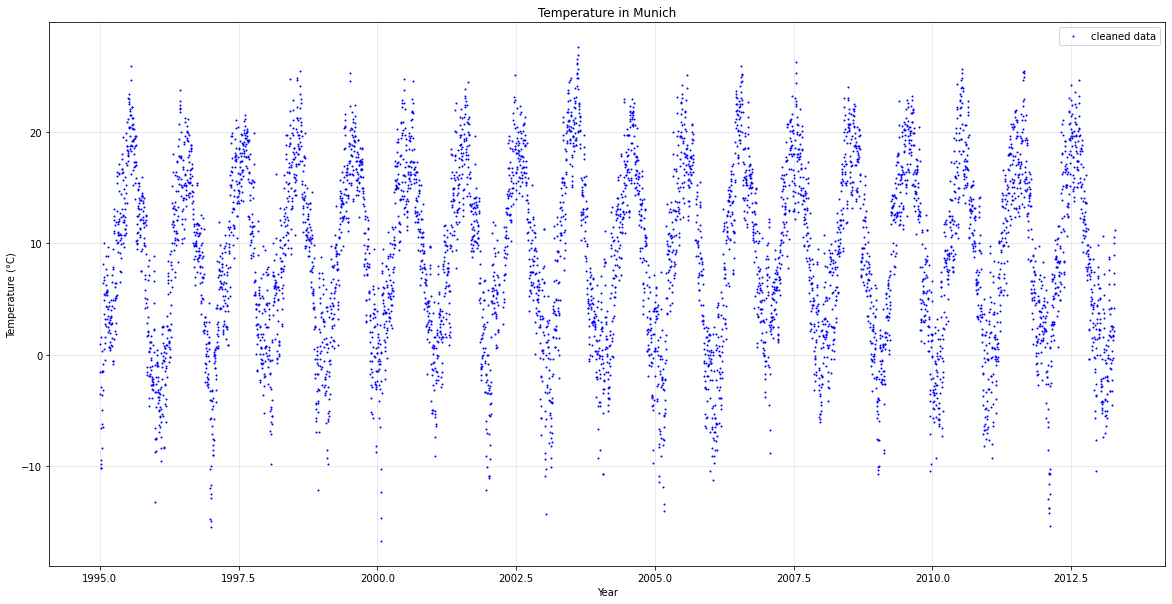

In [18]:
# plotting the cleaned data
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['year'], df['temperature'], color='blue', marker='o', markersize=1, linestyle='None', label='cleaned data')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature in Munich')
ax.legend()
ax.grid(color='black', alpha=.1)
plt.show()

Best-fit values of the parameters of the function 'f(t)':
a = 9.95518350637314 +- 0.06586555297132453
b = -3.394557362984606 +- 0.0066551280137515
c = 9.040845452197562 +- 0.046713165015973786


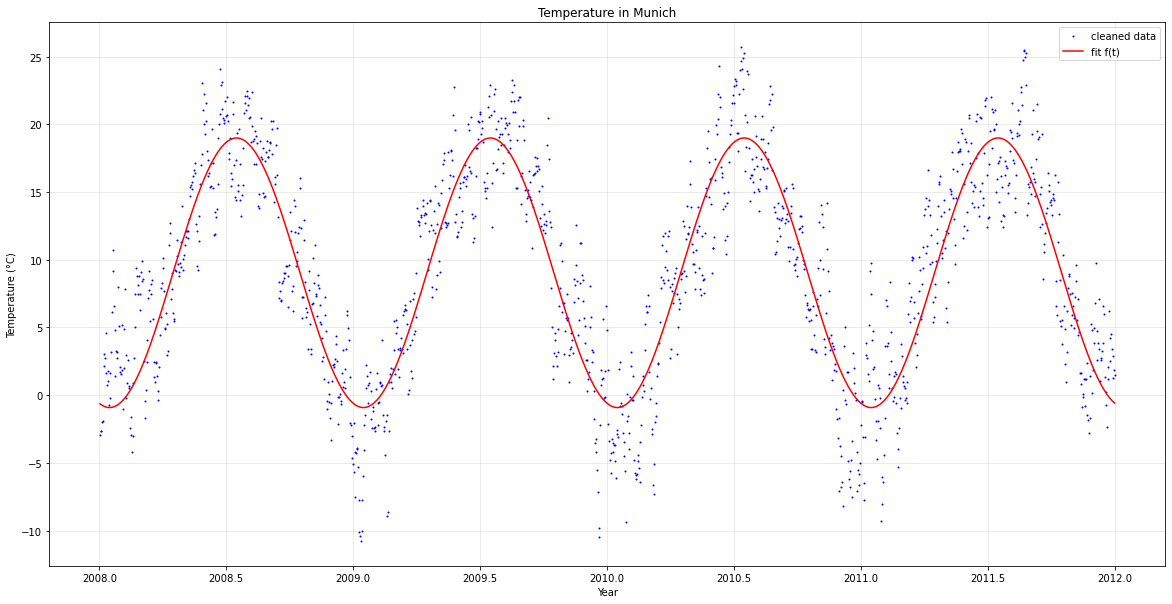

In [19]:
# defining the function 'f(t)' that will be fitted to the data
def f(t, a, b, c):
    return a*np.cos(2*np.pi*t+b)+c
f_pnames = ['a', 'b', 'c']

# fitting the function 'f(t)' to the data
f_pguess = [10, -np.pi, 10]   # initial guess for the parameters a, b, c
f_popt, f_pcov = curve_fit(f=f, xdata=df['year'], ydata=df['temperature'], p0=f_pguess)
f_perrors = np.sqrt(np.diag(f_pcov))
print("Best-fit values of the parameters of the function 'f(t)':")
for param_name, param_value, param_error in zip(f_pnames, f_popt, f_perrors):
    print(param_name, "=", param_value, "+-", param_error)

# plotting the data and the best-fit model 'f(t)' in the range [2008, 2012]
df_plot = df[(2008 < df['year']) & (df['year'] < 2012)]
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_plot['year'], df_plot['temperature'], color='blue', marker='o', markersize=1, linestyle='None', label='cleaned data')
ax.plot(df_plot['year'], f(df_plot['year'], f_popt[0], f_popt[1], f_popt[2]), color='red', label='fit f(t)')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature in Munich')
ax.legend()
ax.grid(color='black', alpha=.1)
plt.show()

In [20]:
# computing the overall average temperature
t_mean = np.mean(df['temperature'])
print("Overall average temperature in Munich:", t_mean, "°C")

# computing the typical daily average temperature predicted by the model f(t) for the coldest time of the year
t_coldest = np.mean(df['temperature'][df['temperature'] < t_mean])
print("Typical daily average temperature predicted by the model 'f(t)' for the coldest time of the year:", t_coldest, "°C")

# computing the typical daily average temperature predicted by the model f(t) for the hottest time of the year
t_hottest = np.mean(df['temperature'][df['temperature'] > t_mean])
print("Typical daily average temperature predicted by the model 'f(t)' for the hottest time of the year:", t_hottest, "°C")

Overall average temperature in Munich: 8.933222104668388 °C
Typical daily average temperature predicted by the model 'f(t)' for the coldest time of the year: 1.9546445669576125 °C
Typical daily average temperature predicted by the model 'f(t)' for the hottest time of the year: 15.496481190266797 °C


The $b$ parameter represents the inital phase of the sinusoidal component of the function $f(t)$.

Its physical sense is to fix the time coordinates of the maxima and minima of $f(t)$ so that they occur, respectively, in the hottest and coldest time of the year.

Best-fit values of the parameters of the function 'g(t)':
a = 9.95538240151057 +- 0.06590813675794938
b = 0.9997601391564541 +- 0.0002000999097029865
c = -0.3739906930345096 +- 2.519828768778366
d = 9.039785387631714 +- 0.0467199447702623


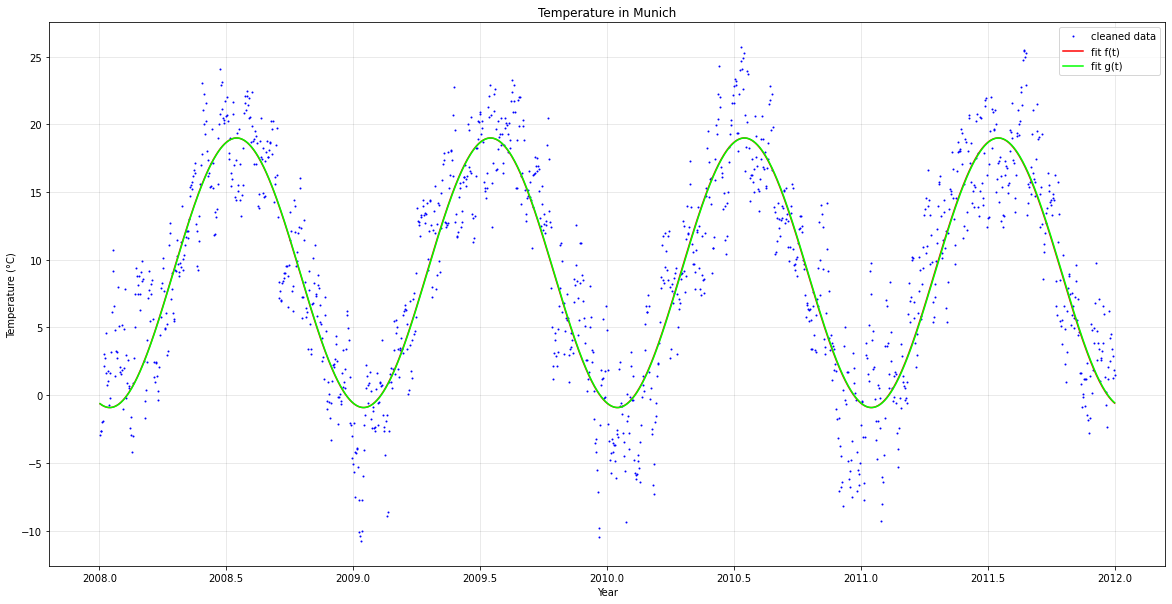

In [21]:
# defining the function 'g(t)' that will be fitted to the data
def g(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t+c)+d
g_pnames = ['a', 'b', 'c', 'd']

# fitting the function 'g(t)' to the data
g_pguess = [10, 1, -np.pi, 10]   # initial guess for the parameters a, b, c, d
g_popt, g_pcov = curve_fit(f=g, xdata=df['year'], ydata=df['temperature'], p0=g_pguess)
g_perrors = np.sqrt(np.diag(g_pcov))
print("Best-fit values of the parameters of the function 'g(t)':")
for param_name, param_value, param_error in zip(g_pnames, g_popt, g_perrors):
    print(param_name, "=", param_value, "+-", param_error)

# plotting the data and the best-fit models 'f(t)', 'g(t)' in the range [2008, 2012]
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_plot['year'], df_plot['temperature'], color='blue', marker='o', markersize=1, linestyle='None', label='cleaned data')
ax.plot(df_plot['year'], f(df_plot['year'], f_popt[0], f_popt[1], f_popt[2]), color='red', label='fit f(t)')
ax.plot(df_plot['year'], g(df_plot['year'], g_popt[0], g_popt[1], g_popt[2], g_popt[3]), color='lime', label='fit g(t)')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature in Munich')
ax.legend()
ax.grid(color='black', alpha=.1)
plt.show()

The fitted functions $f(t)$ and $g(t)$ are almost perfectly superimposed on each other.

In fact, the best-fit value of the additional parameter $b$ of $g(t)$ is compatible with $1$ within the error, therefore the expression of $g(t)$ is reduced almost exactly to the expression of $f(t)$.

In [22]:
# computing the residual sum of squares (RSS) for 'f(t)'
f_rss = np.sum((df['temperature'] - f(df['year'], f_popt[0], f_popt[1], f_popt[2]))**2)
print("Residual sum of squares (RSS) for 'f(t)':", f_rss)

# computing the residual sum of squares (RSS) for 'g(t)'
g_rss = np.sum((df['temperature'] - g(df['year'], g_popt[0], g_popt[1], g_popt[2], g_popt[3]))**2)
print("Residual sum of squares (RSS) for 'g(t)':", g_rss)

Residual sum of squares (RSS) for 'f(t)': 95529.06253319702
Residual sum of squares (RSS) for 'g(t)': 95508.33748266516


In [23]:
# defining the function that performs the Fisher F-test
def F_test(rss_1, rss_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((rss_1 - rss_2) / (ndof_2 - ndof_1)) / (rss_2 / (nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("Is the additional parameter necessary?", "YES," if CL < 0.10 else "NO,", "confidence level:", 100*CL, "%")
    return CL

# running the Fisher F-test
f_ndof = len(f_popt)-1
g_ndof = len(g_popt)-1
print("Fisher F-test, 'f(t)' vs 'g(t)':")
cl = F_test(f_rss, g_rss, f_ndof, g_ndof, len(df['temperature']), verbose=True)

Fisher F-test, 'f(t)' vs 'g(t)':
Is the additional parameter necessary? NO, confidence level: 23.088682152701658 %
